This notebook will focus on the shot/play comparison of All-Star calibre players to league-average players.

For the All-Star scoring versus league average scoring comparison, we have used all-star data acquired from Hockey Reference to name all the all stars from 2011-2025, using the data we will find the top 10 most occuring all stars and feature them in our analysis of all stars. Below is the code to clean the initial all-star data to filter it so we can merge it into our player_info table to acquire the player_ids for all our featured players

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sportypy


player_data = pd.read_pickle("pickled_data/player_info")
plays_data = pd.read_pickle("pickled_data/game_plays")
plays_players_data = pd.read_pickle("pickled_data/game_plays_players")
player_info = pd.read_pickle("pickled_data/player_info")

allstar_data = pd.read_csv("data/allstars.csv")

allstar_data = allstar_data.iloc[:, [0]]
allstar_data.columns = ['fullName']

allstar_data[['firstName', 'lastName']] = allstar_data['fullName'].str.rsplit(n=1, expand=True)

top_10_players = allstar_data['fullName'].value_counts().head(11).index.tolist()

filtered_allstar_df = allstar_data[allstar_data['fullName'].isin(top_10_players)]

filtered_allstar_df = filtered_allstar_df.drop_duplicates(subset='fullName')

display(filtered_allstar_df)

merged_allstar = filtered_allstar_df.merge(player_info, on='fullName', how='left')

display(merged_allstar)





From the code above we have a list of 11 players (Had to add one because one of the players is a goalie) that we will focus on for our analysis. 

We have merged the filtered all stars data-frame with the player info dataframe, acquiring the player_id's for the game plays. 

We can now filter game plays based on each player for their own shooting visualizations

In [116]:
for lastName_x, player_id in zip(merged_allstar['lastName_x'], merged_allstar['player_id']):
    exec(f"{lastName_x}_id = {player_id}")

ovie_plays = plays_players_data[plays_players_data['player_id'] == Ovechkin_id]

kane_plays = plays_players_data[plays_players_data['player_id'] == Kane_id]

weber_plays = plays_players_data[plays_players_data['player_id'] == Weber_id]

mackinnon_plays = plays_players_data[plays_players_data['player_id'] == MacKinnon_id]

giroux_plays = plays_players_data[plays_players_data['player_id'] == Giroux_id]

letang_plays = plays_players_data[plays_players_data['player_id'] == Letang_id]

karlsson_plays = plays_players_data[plays_players_data['player_id'] == Karlsson_id]

stamkos_plays = plays_players_data[plays_players_data['player_id'] == Stamkos_id]

tavares_plays = plays_players_data[plays_players_data['player_id'] == Tavares_id]

burns_plays = plays_players_data[plays_players_data['player_id'] == Burns_id]

ovie2 = pd.merge(ovie_plays, plays_data, on='play_id')

kane2 = pd.merge(kane_plays, plays_data, on='play_id')

weber2 = pd.merge(weber_plays, plays_data, on='play_id')

mackinnon2 = pd.merge(mackinnon_plays, plays_data, on='play_id')

giroux2 = pd.merge(giroux_plays, plays_data, on='play_id')

letang2 = pd.merge(letang_plays, plays_data, on='play_id')

karlsson2 = pd.merge(karlsson_plays, plays_data, on='play_id')

stamkos2 = pd.merge(stamkos_plays, plays_data, on='play_id')

tavares2 = pd.merge(tavares_plays, plays_data, on='play_id')

burns2 = pd.merge(burns_plays, plays_data, on='play_id')



Above we have filtered the all-star data with respect to their player_id, we then all the plays under each player id and separated them by player, this will help us clear up visualizations, as it would be too crowded with all ten players on one graph. 

Now, we have to filter the data further by looking at shooting and scoring, as we are primarily focused on the offensive side of play.

In [171]:
ovie2 = ovie2[(ovie2['playerType'] == 'Shooter') | (ovie2['playerType'] == 'Scorer')]

letang2 = letang2[(letang2['playerType'] == 'Shooter') | (letang2['playerType'] == 'Scorer')]

kane2 = kane2[(kane2['playerType'] == 'Shooter') | (kane2['playerType'] == 'Scorer')]

weber2 = weber2[(weber2['playerType'] == 'Shooter') | (weber2['playerType'] == 'Scorer')]

mackinnon2 = mackinnon2[(mackinnon2['playerType'] == 'Shooter') | (mackinnon2['playerType'] == 'Scorer')]

tavares2 = tavares2[(tavares2['playerType'] == 'Shooter') | (tavares2['playerType'] == 'Scorer')]

giroux2 = giroux2[(giroux2['playerType'] == 'Shooter') | (giroux2['playerType'] == 'Scorer')]

burns2 = burns2[(burns2['playerType'] == 'Shooter') | (burns2['playerType'] == 'Scorer')]

stamkos2 = stamkos2[(stamkos2['playerType'] == 'Shooter') | (stamkos2['playerType'] == 'Scorer')]

karlsson2 = karlsson2[(karlsson2['playerType'] == 'Shooter') | (karlsson2['playerType'] == 'Scorer')]

ovie3 = ovie2.drop_duplicates()

letang3 = letang2.drop_duplicates()

kane3 = kane2.drop_duplicates()

weber3 = weber2.drop_duplicates()

mackinnon3 = mackinnon2.drop_duplicates()

tavares3 = tavares2.drop_duplicates()

giroux3 = giroux2.drop_duplicates()

burns3 = burns2.drop_duplicates()

stamkos3 = stamkos2.drop_duplicates()

karlsson3 = karlsson2.drop_duplicates()

ovieshots = ovie3[ovie3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y']]

letangshots = letang3[letang3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y']]

kaneshots = kane3[kane3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y']]

webershots = weber3[weber3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y']]

mackinnonshots = mackinnon3[mackinnon3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y']]

tavaresshots = tavares3[tavares3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y']]

girouxshots = giroux3[giroux3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y']]

burnsshots = burns3[burns3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y']]

stamkosshots = stamkos3[stamkos3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y']]

karlssonshots = karlsson3[karlsson3['event'].isin(['Shot', 'Goal'])][['event', 'secondaryType', 'st_x', 'st_y']]


Now above we have all the top 10 players shot data, with the type of shot and where on the ice they were when they took the shot/scored the goal. We can now use this data to visualize the shot attempts in scatter plots. 

/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_49742/3255862463.py:39: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_49742/3255862463.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)


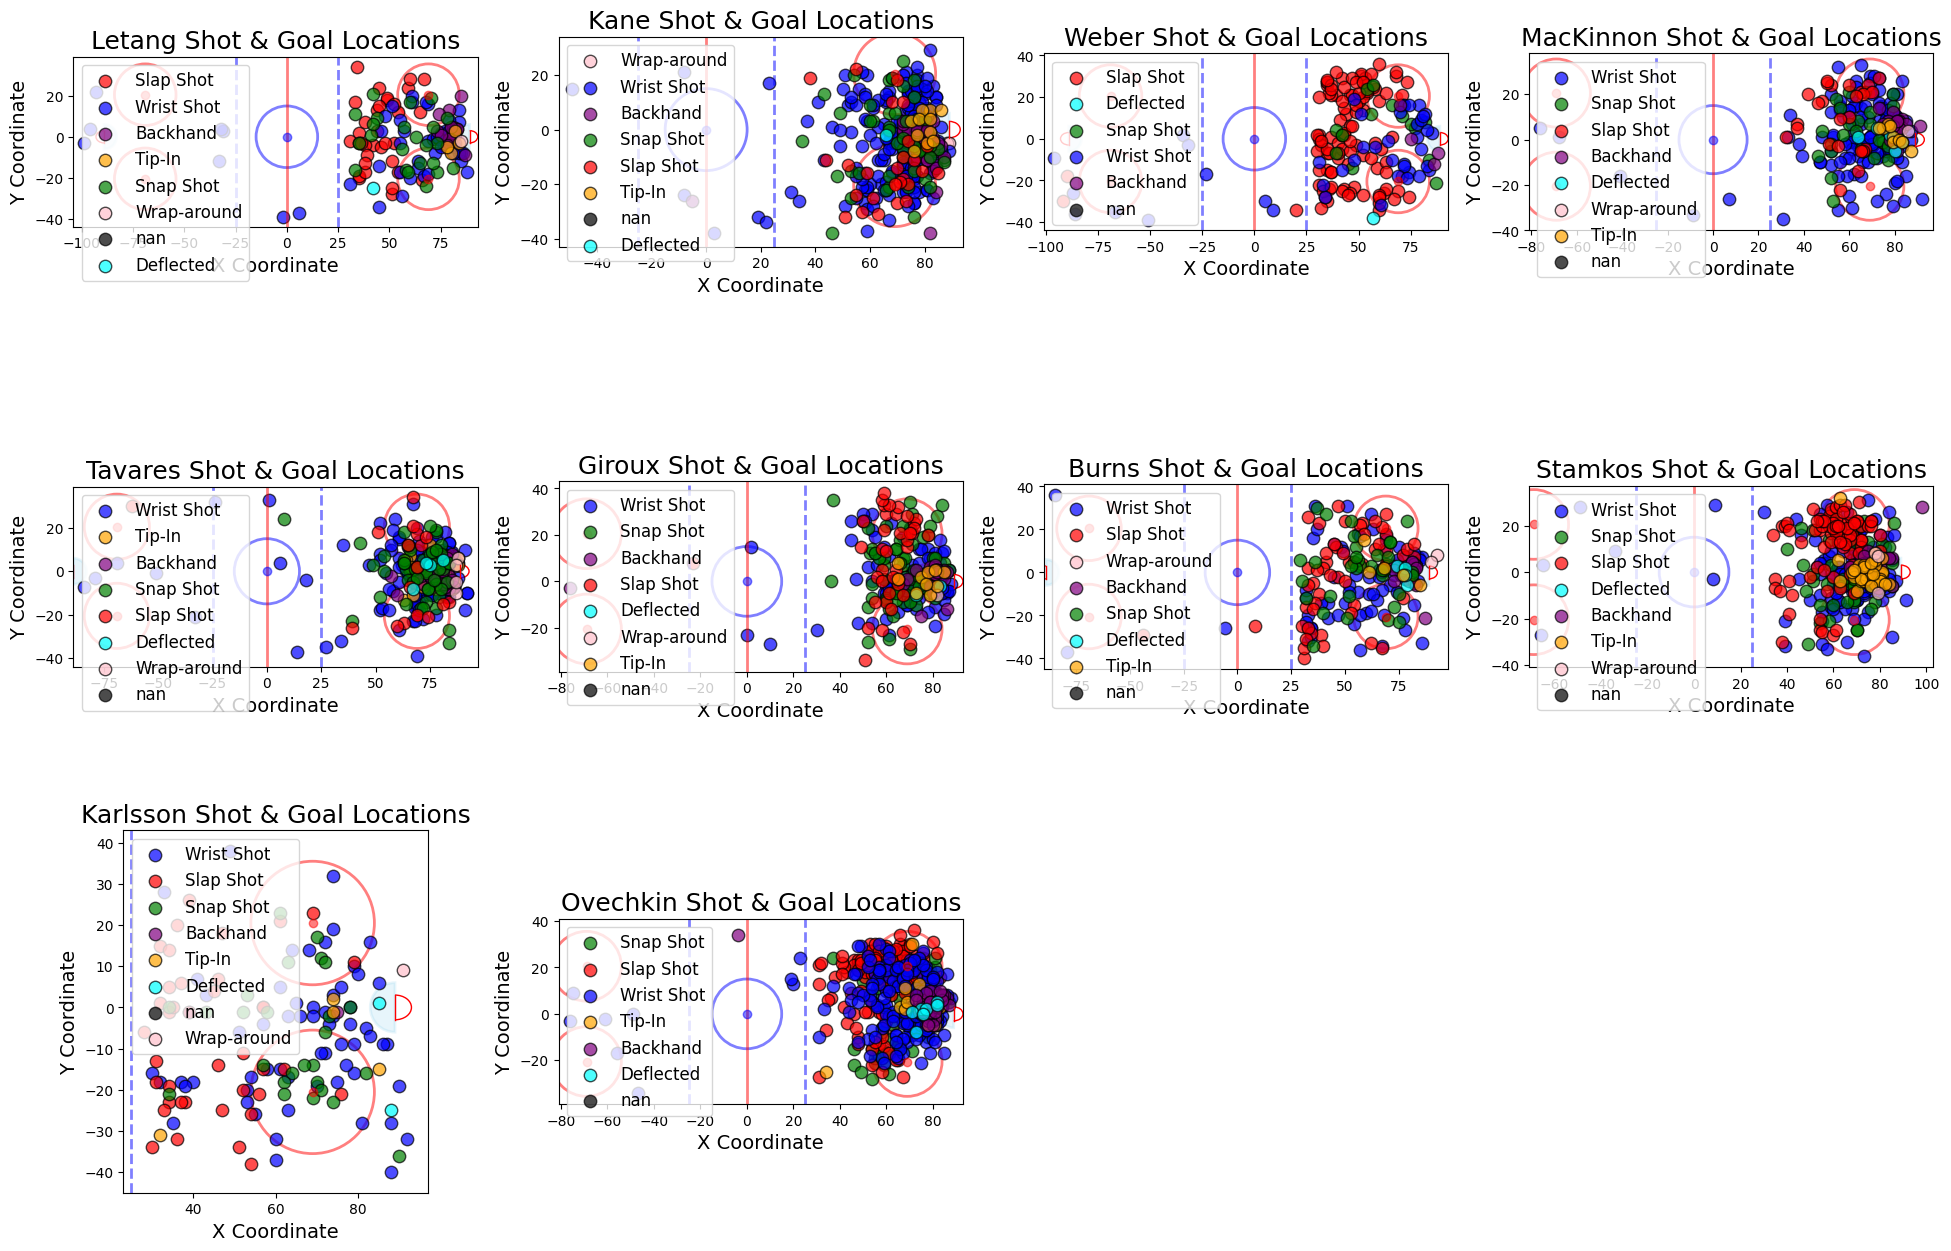

In [165]:
players = {
    "Letang": letangshots, "Kane": kaneshots, "Weber": webershots, "MacKinnon": mackinnonshots,
    "Tavares": tavaresshots, "Giroux": girouxshots, "Burns": burnsshots, "Stamkos": stamkosshots, "Karlsson": karlssonshots, "Ovechkin": ovieshots
}

fig, axes = plt.subplots(3, 4, figsize=(24,16))

axes = axes.flatten()

shot_colors = {
    "Wrist Shot": "blue",
    "Slap Shot": "red",
    "Snap Shot": "green",
    "Backhand": "purple",
    "Tip-In": "orange",
    "Deflected": "cyan",
    "Wrap-around": "pink",
    "Unknown": "gray"
}

for i, (player, df) in enumerate(players.items()):
    ax = axes[i]
    filtered_df = df[df['event'].isin(['Goal'])]
    draw_rink(ax)
    unique_shot_types = filtered_df['secondaryType'].unique() 

    for shot_type in unique_shot_types:
        subset = filtered_df[filtered_df['secondaryType'] == shot_type]
        color = shot_colors.get(shot_type, "black")  # Default to black if unknown shot type
        ax.scatter(subset['st_x'], subset['st_y'], label=shot_type, s=80, alpha=0.7, c=color, edgecolors="black")

    ax.set_title(f"{player} Shot & Goal Locations", fontsize=18)
    ax.set_xlabel("X Coordinate", fontsize=14)
    ax.set_ylabel("Y Coordinate", fontsize=14)
    ax.legend(fontsize=12, loc="upper left")
    ax.set_xlim(filtered_df['st_x'].min() - 5, filtered_df['st_x'].max() + 5)
    ax.set_ylim(filtered_df['st_y'].min() - 5, filtered_df['st_y'].max() + 5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


Looking at the goal graphs, we can infer that each player tended to favor certain types of shots for their goals, mainly specializing in one two signature shots in order to score their goals. For example, in the Shea Weber graph, he tended to favor slap shots over any other type of shots for the majority of goals he scored. The locations are also interesting, as some players tended to stick to one location for their goals, and others were all over the place. Next, we will look more into goal locations for each player using a heatmap. 

In [153]:
def draw_rink(ax):
    '''
    Displays a hockey rink with NHL dimensions at current axes
    Parameter ax: Current axes
    Returns nothing
    '''

    # Draw the center ice line
    ax.axvline(0, color='red', linestyle='-', linewidth=2, alpha=0.5)
    
    # Draw the blue lines at +/- 25 feet from center ice
    ax.axvline(-25, color='blue', linestyle='--', linewidth=2, alpha=0.5)
    ax.axvline(25, color='blue', linestyle='--', linewidth=2, alpha=0.5)

    # Draw blue faceoff circle at center ice (15 ft radius) with blue dot at the center
    center_circle = plt.Circle((0, 0), 15, edgecolor='blue', facecolor='none', alpha = 0.5, lw=2)
    ax.add_patch(center_circle)
    ax.plot(0, 0, marker='o', color='blue', alpha = 0.5, markersize=6)  
    
    # Draw the 4 red faceoff circles with red dots at center (31 feet from end boards and 20.5 feet from side boards)
    faceoff_positions = [(69, 20.5), (-69, 20.5), (69, -20.5), (-69, -20.5)]
    for x, y in faceoff_positions:
        faceoff_circle = plt.Circle((x, y), 15, edgecolor='red', facecolor='none', alpha = 0.5, lw=2)
        ax.add_patch(faceoff_circle)
        ax.plot(x, y, marker='o', color='red', alpha = 0.5, markersize=6)  
    
    # Draw goal lines for net (6 ft)
    ax.plot([-89, -89], [-3, 3], color='red', lw=1)  # Left goal line
    ax.plot([89, 89], [-3, 3], color='red', lw=1)    # Right goal line

    # Draw back of goals as arcs (6 ft wide and 4 ft deep)
    left_goal= Arc((-89, 0), width=6, height=8, angle=90, theta1=360, theta2=180, color='red', lw=1)
    right_goal = Arc((89, 0), width=6, height=8, angle=90, theta1=180, theta2=360, color='red', lw=1)

    ax.add_patch(left_goal)
    ax.add_patch(right_goal)

    # Draw the goal creases using Wedges and fill with low opacity (6 ft radius)
    left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
    right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)

    ax.add_patch(left_goal_crease)
    ax.add_patch(right_goal_crease)

    # Set the rink bounds (200 ft by 85 ft)
    ax.set_xlim(-100, 100)        
    ax.set_ylim(-42.5, 42.5)

    # Treat x and y units equally so circles are drawn correctly
    ax.set_aspect('equal')

/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_49742/3255862463.py:39: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_49742/3255862463.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  right_goal_crease = Wedge((89, 0), r=6, theta1=90, theta2=270, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_49742/3255862463.py:39: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  left_goal_crease = Wedge((-89, 0), r=6, theta1=270, theta2=90, color='skyblue', alpha=0.2, edgecolor='blue', lw=2)
/var/folders/jy/wshsbfds2t7gmczffxg5v5lh0000gn/T/ipykernel_49742/3255862463.py:40: UserWarning: Setting the 'color'

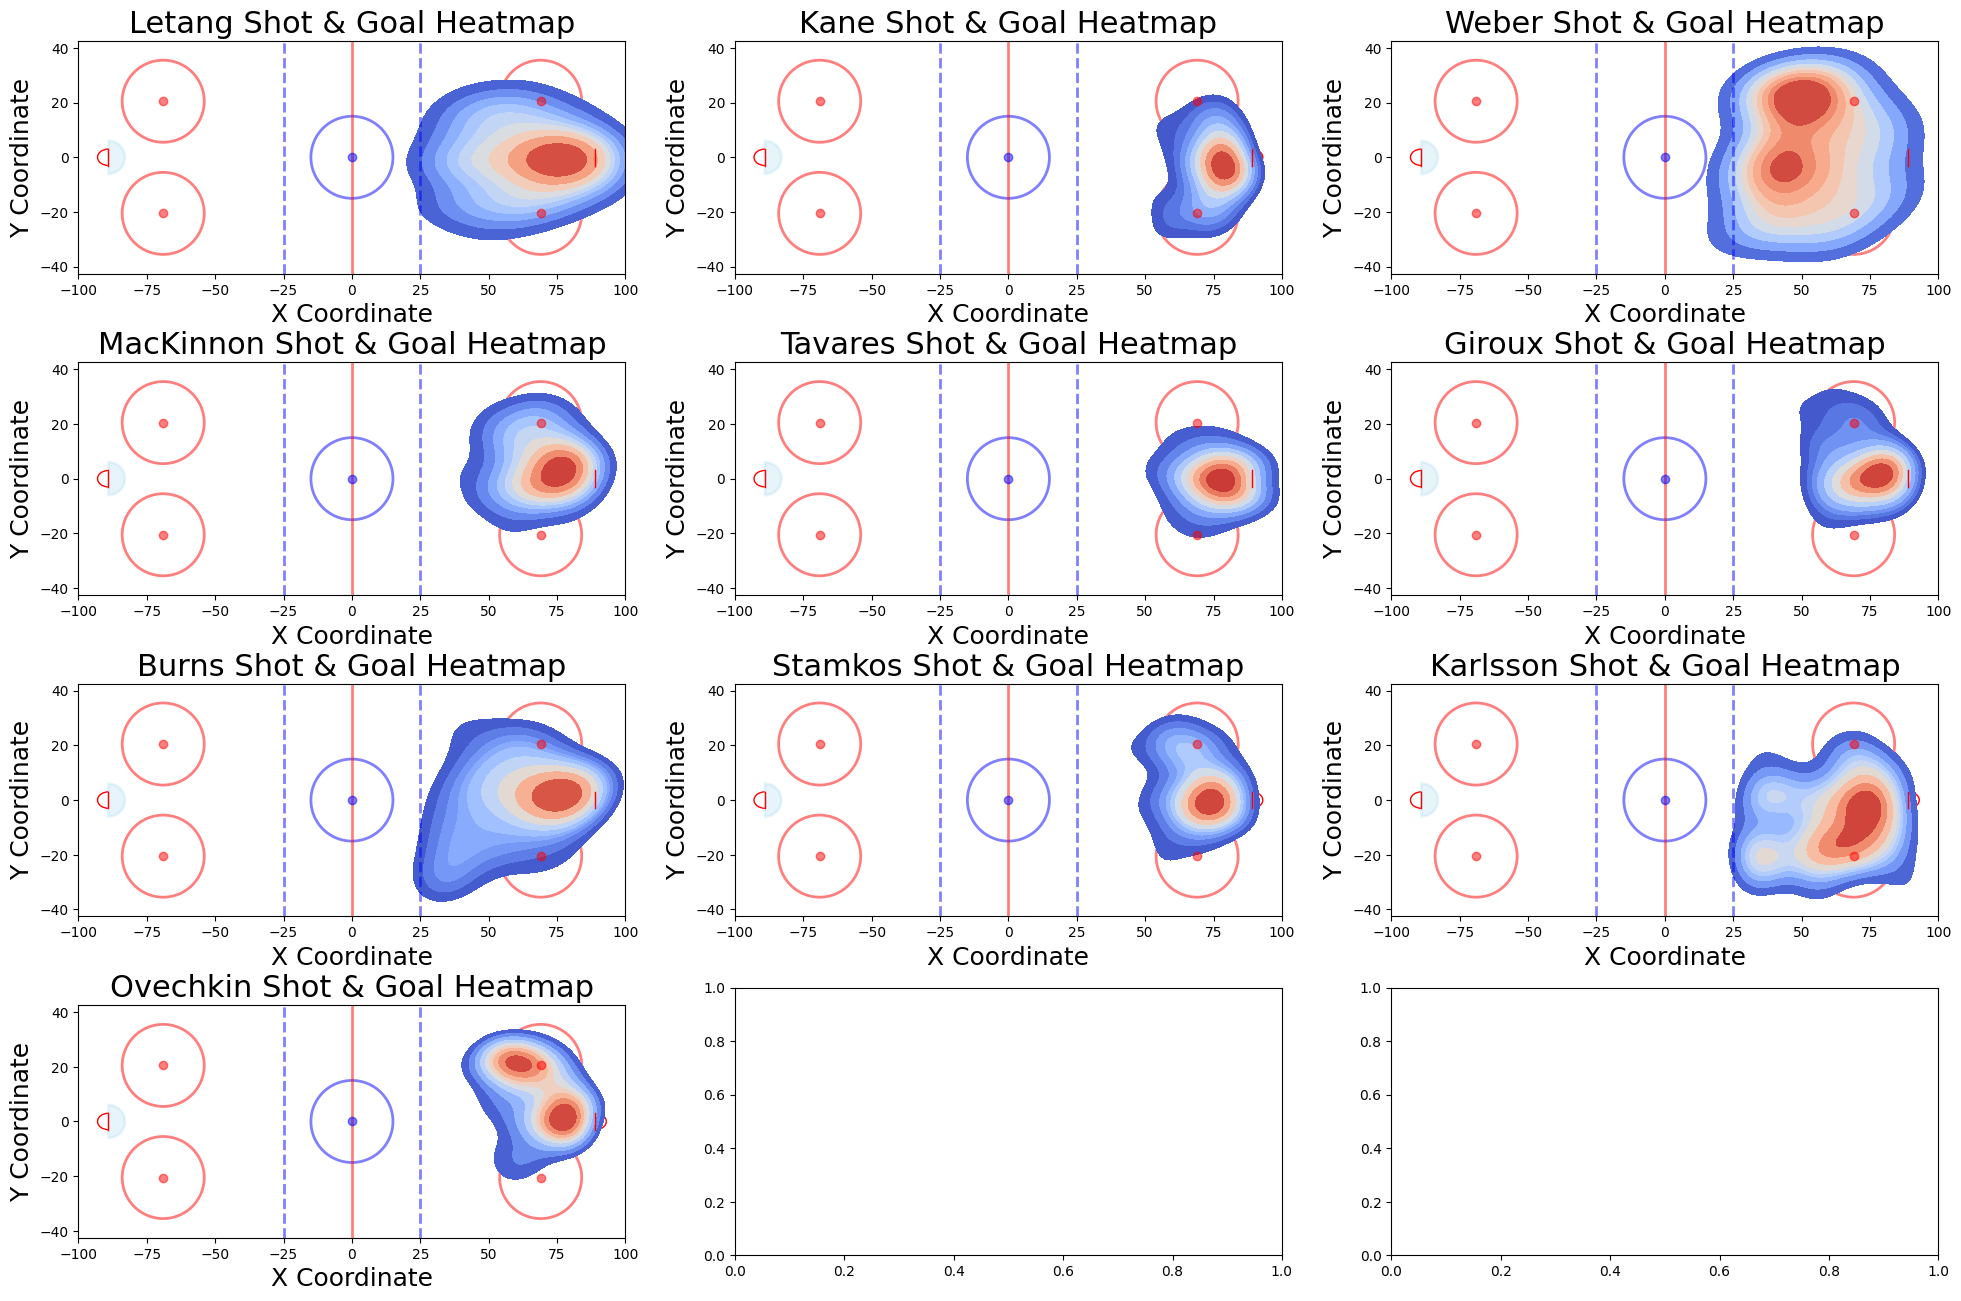

In [169]:
fig, axes = plt.subplots(4, 3, figsize=(24,16))

axes = axes.flatten()

for i, (player, df) in enumerate(players.items()):

    ax = axes[i]

    draw_rink(ax)

    filtered_df = df[df['event'].isin(['Goal'])]

    sns.kdeplot(
        x ='st_x', y = 'st_y', data=filtered_df, thresh=0.2, fill=True, cmap='coolwarm', ax=ax)
    
    ax.set_title(f"{player} Shot & Goal Heatmap", fontsize=22)  # Bigger title font
    ax.set_xlabel("X Coordinate", fontsize=18)  # Bigger axis labels
    ax.set_ylabel("Y Coordinate", fontsize=18)


plt.show()

The heatmaps above show key information for how all-stars tend to favor certain locations on the ice for all of their goals. For example, Alexander Ovechkin primarily scored goals in the left circle, and Shea Weber also had most of his goals scored in the bottom of the left circle in 2 primary locations. 

In [174]:
for player, df in players.items():
    most_common_shot = df['secondaryType'].value_counts().idxmax()
    shot_count = df['secondaryType'].value_counts().max()

print(f"{player}: {most_common_shot} ({shot_count} times)")

Ovechkin: Wrist Shot (1738 times)
